### Checking the quality of variants in newest dataset

In [1]:
import numpy as np
import zarr
import numcodecs
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.1.10


/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Here, I am just setting up the paths to the data.

In [2]:
datadir = "/home/jamc/Data/GitHub/BetaAnalysis/data/"
vcffile = datadir + "Bmar_proper_rmdup_ready_sorted_Bvchr1_combined_genotyped.vcf"
zarr_group = datadir + "beta_analysis_v1p0.zr"

In [3]:
# load variant call directory
callset = zarr.open_group(zarr_group, mode='r')
# show directory structure
callset.tree(expand=True)

/
 └── Bvchr1
     ├── calldata
     │   ├── AD (5018837, 170, 4) int16
     │   ├── DP (5018837, 170) int16
     │   ├── GQ (5018837, 170) int8
     │   ├── GT (5018837, 170, 2) int8
     │   ├── MBQ (5018837, 170, 3) float32
     │   ├── MFRL (5018837, 170, 4) float32
     │   ├── MIN_DP (5018837, 170) int32
     │   ├── MMQ (5018837, 170, 3) float32
     │   ├── MPOS (5018837, 170, 3) float32
     │   ├── PGT (5018837, 170) object
     │   ├── PID (5018837, 170) object
     │   ├── PL (5018837, 170, 3) int32
     │   ├── RGQ (5018837, 170) int32
     │   └── SB (5018837, 170, 4) int32
     ├── samples (170,) object
     └── variants
         ├── AC (5018837, 3) int32
         ├── AF (5018837, 3) float32
         ├── ALT (5018837, 3) object
         ├── AN (5018837,) int32
         ├── BaseQRankSum (5018837,) float32
         ├── CHROM (5018837,) object
         ├── ClippingRankSum (5018837,) float32
         ├── DP (5018837,) int32
         ├── DS (5018837,) bool
         ├── END (5018837,) int32
         ├── ExcessHet (5018837,) float32
         ├── FILTER_LowQual (5018837,) bool
         ├── FILTER_PASS (5018837,) bool
         ├── FS (5018837,) float32
         ├── ID (5018837,) object
         ├── InbreedingCoeff (5018837,) float32
         ├── MLEAC (5018837, 3) int32
         ├── MLEAF (5018837, 3) float32
         ├── MQ (5018837,) float32
         ├── MQRankSum (5018837,) float32
         ├── POS (5018837,) int32
         ├── QD (5018837,) float32
         ├── QUAL (5018837,) float32
         ├── RAW_MQ (5018837,) float32
         ├── REF (5018837,) object
         ├── ReadPosRankSum (5018837,) float32
         ├── SOR (5018837,) float32
         ├── is_snp (5018837,) bool
         ├── numalt (5018837,) int32
         └── svlen (5018837, 3) int32

In [145]:
filters = [
    'Bvchr1/variants/SOR',
    'Bvchr1/variants/FS',
    'Bvchr1/variants/QD',
    'Bvchr1/variants/MQ',
    'Bvchr1/variants/DP',
    'Bvchr1/variants/MQRankSum',
    'Bvchr1/variants/BaseQRankSum',
    'Bvchr1/variants/ReadPosRankSum'
]

values = [
    3, 30, 25, 1700, 340, -12.5, -12.5, -8.0
]

# Bvchr1_SOR =  callset['Bvchr1/variants/SOR'][:] < 3
# Bvchr1_SNP =  callset['Bvchr1/variants/is_snp'][:]
# Bvchr1_QD =   callset['Bvchr1/variants/QD'][:] > 30
# Bvchr1_MQ =   callset['Bvchr1/variants/MQ'][:] > 25
# Bvchr1_DPU =  callset['Bvchr1/variants/DP'][:] < 1700
# Bvchr1_DPL =  callset['Bvchr1/variants/DP'][:] > 340
# Bvchr1_MQRS = callset['Bvchr1/variants/MQRankSum'][:] > -12.5
# Bvchr1_BQRS = callset['Bvchr1/variants/BaseQRankSum'][:] > -12.5
# Bvchr1_RPRS = callset['Bvchr1/variants/ReadPosRankSum'][:] > -8.0

nan_filters = [np.isfinite(callset[x][:]) for x in filters]


Bvchr1_SOR =  callset['Bvchr1/variants/SOR'][:]
Bvchr1_FS =  callset['Bvchr1/variants/FS'][:]
Bvchr1_QD =   callset['Bvchr1/variants/QD'][:]
Bvchr1_MQ =   callset['Bvchr1/variants/MQ'][:]
Bvchr1_DP =  callset['Bvchr1/variants/DP'][:]
Bvchr1_MQRS = callset['Bvchr1/variants/MQRankSum'][:]
Bvchr1_BQRS = callset['Bvchr1/variants/BaseQRankSum'][:]
Bvchr1_RPRS = callset['Bvchr1/variants/ReadPosRankSum'][:]

Bvchr1_MQ = callset['Bvchr1/variants/MQ'][:][~np.isnan(Bvchr1_MQ)]
Bvchr1_QD = callset['Bvchr1/variants/QD'][:][~np.isnan(Bvchr1_QD)]
Bvchr1_SOR = callset['Bvchr1/variants/SOR'][:][~np.isnan(Bvchr1_SOR)]
Bvchr1_MQRS = callset['Bvchr1/variants/MQRankSum'][:][~np.isnan(Bvchr1_MQRS)]
Bvchr1_BQRS = callset['Bvchr1/variants/BaseQRankSum'][:][~np.isnan(Bvchr1_BQRS)]
Bvchr1_RPRS = callset['Bvchr1/variants/ReadPosRankSum'][:][~np.isnan(Bvchr1_RPRS)]


np.clip(Bvchr1_DP, 0, 2000, Bvchr1_DP)
np.clip(Bvchr1_FS, 0, 40, Bvchr1_FS)
np.clip(Bvchr1_MQ, 0, 100, Bvchr1_MQ)
np.clip(Bvchr1_SOR, 0, 10, Bvchr1_SOR)

# np.clip(Bvchr1_SOR, 0, 25, Bvchr1_SOR)

# Bvchr1_RAW_MQ

array([2.303, 1.022, 1.022, ..., 2.833, 5.943, 1.609], dtype=float32)

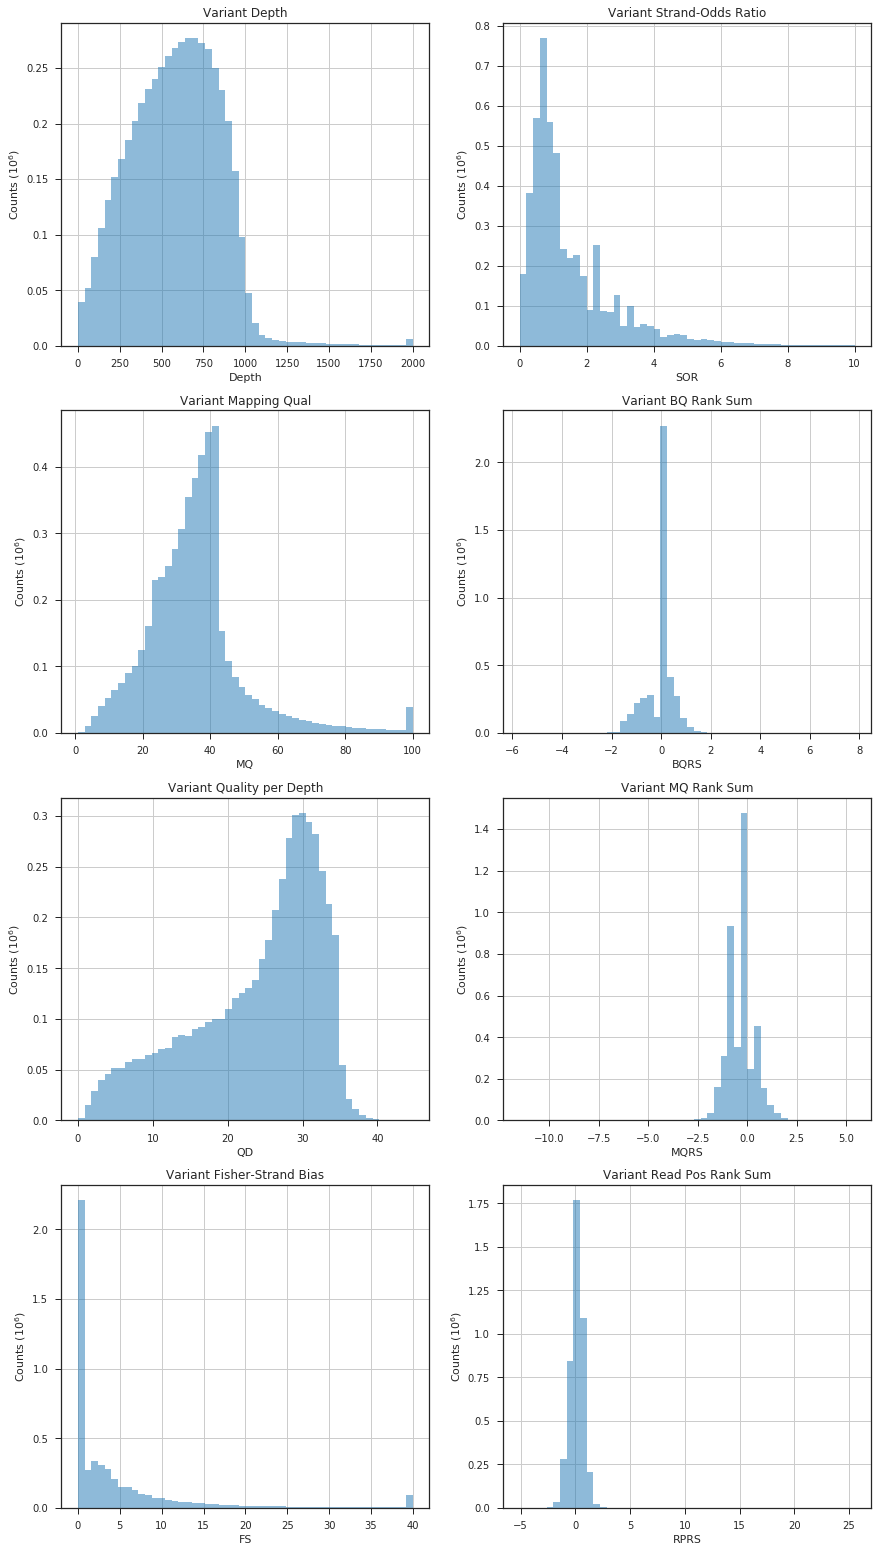

In [146]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks", {"axes.grid": True})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

def variant_metric_hist(metric, ax, yax_scale=1e6, bins=30, title="", xlabel="", ylabel=""):
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.hist(metric, bins, alpha=0.5)
    locs = ax.get_yticks()
    labels = [str(round(x/yax_scale, 2)) for x in locs]
    ax.set_yticklabels(labels)

fig, ax = plt.subplots(figsize=(10,15), ncols=2, nrows=4)
plt.subplots_adjust(top=1.5, right=1.25)
# fig.tight_layout()

variant_metric_hist(Bvchr1_DP,   ax[0][0], bins=50, title="Variant Depth", xlabel="Depth", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_MQ,   ax[1][0], bins=50, title="Variant Mapping Qual", xlabel="MQ", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_QD,   ax[2][0], bins=50, title="Variant Quality per Depth", xlabel="QD", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_FS,   ax[3][0], bins=50, title="Variant Fisher-Strand Bias", xlabel="FS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_SOR,  ax[0][1], bins=50, title="Variant Strand-Odds Ratio", xlabel="SOR", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_BQRS, ax[1][1], bins=50, title="Variant BQ Rank Sum", xlabel="BQRS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_MQRS, ax[2][1], bins=50, title="Variant MQ Rank Sum", xlabel="MQRS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_RPRS, ax[3][1], bins=50, title="Variant Read Pos Rank Sum", xlabel="RPRS", ylabel=r"Counts ($10^6$)")

Now, I will apply filters based on the above plots and if a variant is a SNP. I think the most important variable here is going to the Quality by Depth metric. I want to see what happens when I remove only variants with $QD < 25$.

In [137]:
QDf =   callset['Bvchr1/variants/QD'][:] >= 25
SNPf =  callset['Bvchr1/variants/is_snp'][:]
SORf =  callset['Bvchr1/variants/SOR'][:] < 3
MQf =   callset['Bvchr1/variants/MQ'][:] > 30
DPUf =  callset['Bvchr1/variants/DP'][:] < 1700
DPLf =  callset['Bvchr1/variants/DP'][:] > 340
MQRSf = callset['Bvchr1/variants/MQRankSum'][:] > -12.5
BQRSf = callset['Bvchr1/variants/BaseQRankSum'][:] > -12.5
RPRSf = callset['Bvchr1/variants/ReadPosRankSum'][:] > -8.0
FSf =  callset['Bvchr1/variants/FS'][:] < 60
ALTf = []

for alt in callset['Bvchr1/variants/ALT'][:]:
    if len(set(alt)) == 2:
        ALTf.append(True)
    else:
        ALTf.append(False)


filters = np.array(
    [SNPf, QDf, ALTf, SORf, MQf, DPUf, DPLf, MQRSf, BQRSf, RPRSf, FSf] + nan_filters
)

Bvchr1_filter = np.all(filters, axis=0)

good_variants = Bvchr1_filter.sum()
print("Number of filter passing variants: %s" % good_variants)

/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/mnt/Data/Programs/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Number of filter passing variants: 980117


In [138]:
Bvchr1_SOR =  callset['Bvchr1/variants/SOR'][:]
Bvchr1_FS =  callset['Bvchr1/variants/FS'][:]
Bvchr1_QD =   callset['Bvchr1/variants/QD'][:]
Bvchr1_MQ =   callset['Bvchr1/variants/MQ'][:]
Bvchr1_DP =  callset['Bvchr1/variants/DP'][:]
Bvchr1_MQRS = callset['Bvchr1/variants/MQRankSum'][:]
Bvchr1_BQRS = callset['Bvchr1/variants/BaseQRankSum'][:]
Bvchr1_RPRS = callset['Bvchr1/variants/ReadPosRankSum'][:]

Bvchr1_SOR_filter =  Bvchr1_SOR.compress(Bvchr1_filter, axis=0)
Bvchr1_FS_filter =   Bvchr1_FS.compress(Bvchr1_filter, axis=0)
Bvchr1_QD_filter =   Bvchr1_QD.compress(Bvchr1_filter, axis=0)
Bvchr1_MQ_filter =   Bvchr1_MQ.compress(Bvchr1_filter, axis=0)
Bvchr1_DP_filter =   Bvchr1_DP.compress(Bvchr1_filter, axis=0)
Bvchr1_MQRS_filter = Bvchr1_MQRS.compress(Bvchr1_filter, axis=0)
Bvchr1_BQRS_filter = Bvchr1_BQRS.compress(Bvchr1_filter, axis=0)
Bvchr1_RPRS_filter = Bvchr1_RPRS.compress(Bvchr1_filter, axis=0)

np.clip(Bvchr1_DP_filter, 0, 2000, Bvchr1_DP_filter)
np.clip(Bvchr1_FS_filter, 0, 40, Bvchr1_FS_filter)
np.clip(Bvchr1_MQ_filter, 0, 100, Bvchr1_MQ_filter)
np.clip(Bvchr1_SOR_filter, 0, 10, Bvchr1_SOR_filter)

array([1.737, 0.561, 0.277, ..., 0.986, 1.981, 0.883], dtype=float32)

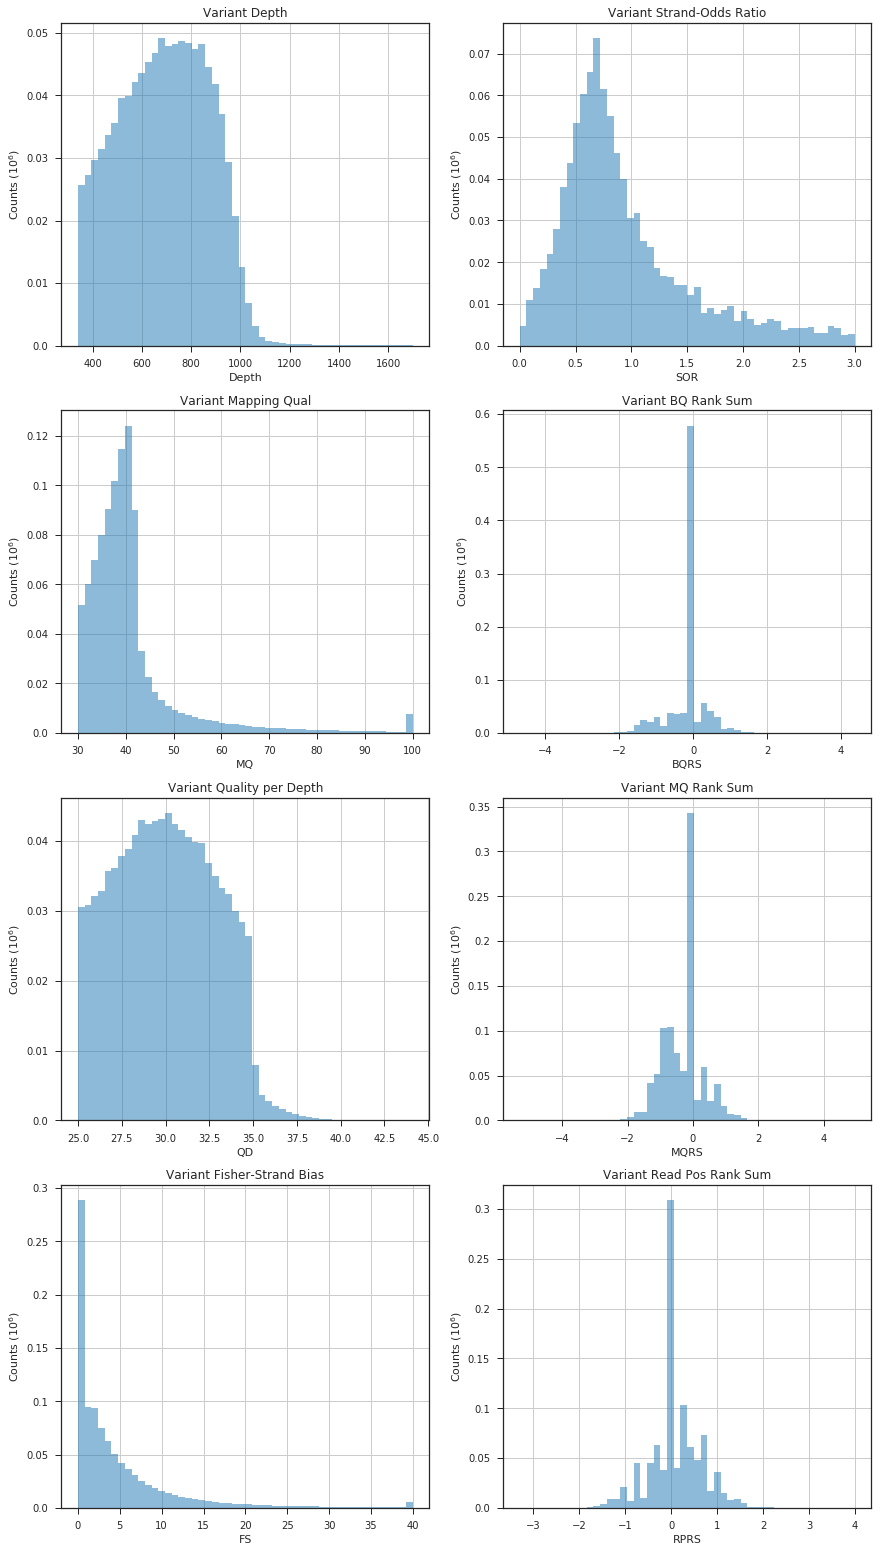

In [143]:
fig2, ax2 = plt.subplots(figsize=(10,15), ncols=2, nrows=4)
plt.subplots_adjust(top=1.5, right=1.25)

variant_metric_hist(Bvchr1_DP_filter,   ax2[0][0], bins=50, title="Variant Depth", xlabel="Depth", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_MQ_filter,   ax2[1][0], bins=50, title="Variant Mapping Qual", xlabel="MQ", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_QD_filter,   ax2[2][0], bins=50, title="Variant Quality per Depth", xlabel="QD", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_FS_filter,   ax2[3][0], bins=50, title="Variant Fisher-Strand Bias", xlabel="FS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_SOR_filter,  ax2[0][1], bins=50, title="Variant Strand-Odds Ratio", xlabel="SOR", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_BQRS_filter, ax2[1][1], bins=50, title="Variant BQ Rank Sum", xlabel="BQRS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_MQRS_filter, ax2[2][1], bins=50, title="Variant MQ Rank Sum", xlabel="MQRS", ylabel=r"Counts ($10^6$)")
variant_metric_hist(Bvchr1_RPRS_filter, ax2[3][1], bins=50, title="Variant Read Pos Rank Sum", xlabel="RPRS", ylabel=r"Counts ($10^6$)")

In [150]:
# Apply filter to chromosome and position from the reference genome
Bvchr1_chromosome = callset['Bvchr1/variants/CHROM'][:]
Bvchr1_position   = callset['Bvchr1/variants/POS'][:]

first_scaffold = Bvchr1_chromosome == "Bvchr1.sca001"
Bvchr1_sca001_filter = np.logical_and(first_scaffold, Bvchr1_filter)
print(Bvchr1_sca001_filter)

Bvchr1_filtered_chromosome = Bvchr1_chromosome.compress(Bvchr1_sca001_filter, axis=0)
Bvchr1_filtered_position   = Bvchr1_position.compress(  Bvchr1_sca001_filter, axis=0)

# Kind of inefficient, but can get the last index by cumulative sum
# This will be the last time that CHROM == "Scaffold-name"
Bvchr1_sca001_pos = np.cumsum(Bvchr1_sca001_filter)
Bvchr1_positions = allel.SortedIndex(
    Bvchr1_filtered_position[0:Bvchr1_sca001_pos[-1]]
)
Bvchr1_positions

[False False False ... False False False]


0,1,2,3,4,...,206944,206945,206946,206947,206948
8090,8148,8155,8172,8210,...,8250880,8251014,8251048,8252133,8255845


In [156]:
Bvchr1_sca001_pos

array([     0,      0,      0, ..., 206949, 206949, 206949])

In [151]:
# Plotting function taken from the following address:
# http://alimanfoo.github.io/2017/06/14/read-vcf.html
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows
    bins = np.arange(0, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)
    return y.mean()

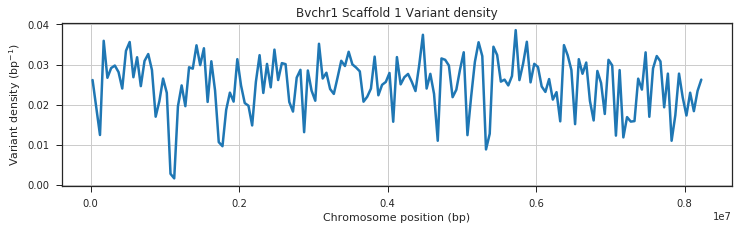

In [152]:
Bvchr1_Scaffold001_mean_vd = plot_windowed_variant_density(
    Bvchr1_positions, window_size=50000, title='Bvchr1 Scaffold 1 Variant density'
)

In [153]:
print(1/Bvchr1_Scaffold001_mean_vd)

39.87163749190485


In [166]:
def get_scaffold_variants(data, chrom_call, pos_call, scaff_id, filt):
    chrom = data[chrom_call][:]
    pos = data[pos_call][:]
    scaff = chrom == scaff_id
    vfilt = np.logical_and(filt, scaff)
    chromf = chrom.compress(vfilt, axis=0)
    posf = pos.compress(vfilt, axis=0)
    scaff_pos = np.cumsum(vfilt)
    variant_positions = allel.SortedIndex(
        posf[scaff_pos[0]:scaff_pos[-1]]
    )
    return variant_positions

test = get_scaffold_variants(callset, 'Bvchr1/variants/CHROM', 'Bvchr1/variants/POS', 'Bvchr1.sca002', Bvchr1_filter)
test

0,1,2,3,4,...,121433,121434,121435,121436,121437
1315,3518,3531,3581,3593,...,6426561,6426930,6426966,6427091,6427141


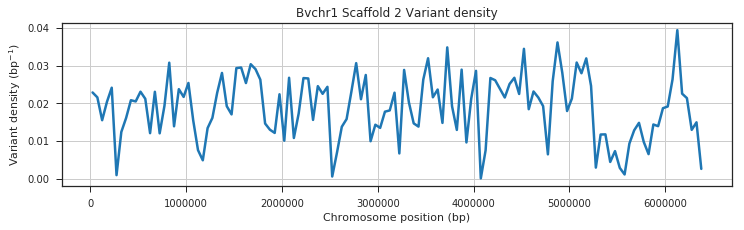

In [164]:
Bvchr1_Scaffold002_mean_vd = plot_windowed_variant_density(
    test, window_size=50000, title='Bvchr1 Scaffold 2 Variant density'
)

In [167]:
Bvchr1_scaff_3_vars = get_scaffold_variants(
    callset, 'Bvchr1/variants/CHROM', 'Bvchr1/variants/POS'
    , 'Bvchr1.sca003', Bvchr1_filter
)
Bvchr1_scaff_3_vars

0,1,2,3,4,...,28644,28645,28646,28647,28648
25502,25514,25522,25534,25538,...,1416748,1416776,1416777,1416780,1416870


49.53799669746689


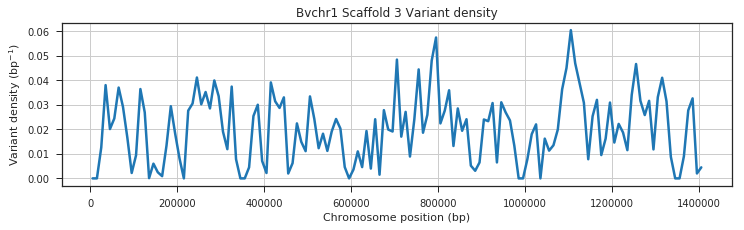

In [176]:
Bvchr1_Scaffold003_mean_vd = plot_windowed_variant_density(
    Bvchr1_scaff_3_vars, window_size=10000, title='Bvchr1 Scaffold 3 Variant density'
)
print(1/Bvchr1_Scaffold003_mean_vd)
